In [8]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [9]:
!ls gdrive/MyDrive/MathWorks/employment_data

england.csv		 pennsylvania.csv	      washington.csv
england_normalized.csv	 pennsylvania_normalized.csv  washington_normalized.csv
nebraska.csv		 wales.csv
nebraska_normalized.csv  wales_normalized.csv


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path_to_folder = 'gdrive/MyDrive/MathWorks/'
employment_path = path_to_folder + 'employment_data/'

cities = ["Washington", "Pennsylvania", "Nebraska", "England", "Wales"]

# washington_employment = pd.read_csv(employment_path + 'washington.csv')
# pennsylvania_employment = pd.read_csv(employment_path + 'pennsylvania.csv')
# nebraska_employment = pd.read_csv(employment_path + 'nebraska.csv')
# england_employment = pd.read_csv(employment_path + 'england.csv')
# wales_employment = pd.read_csv(employment_path + 'wales.csv')

employment_data = [pd.read_csv(employment_path + 'washington.csv'), 
                   pd.read_csv(employment_path + 'pennsylvania.csv'),
                   pd.read_csv(employment_path + 'nebraska.csv'),
                   pd.read_csv(employment_path + 'england.csv'),
                   pd.read_csv(employment_path + 'wales.csv')]

In [28]:
import sys
non_nan_cols = []

for city in range(len(employment_data)):
  employment_data[city].rename(columns = {"Unnamed: 0": "Job Activity"}, inplace=True) 
  employment_data[city] = employment_data[city].dropna(axis='columns')

  non_nan_cols.append(employment_data[city].columns)

  # print(employment_data[city])
  for column in employment_data[city].columns:
    if (column != "Job Activity"):
      employment_data[city][column] = employment_data[city][column]  / sum(employment_data[city][column])

In [29]:
employment_data[0].to_csv(employment_path + 'washington_normalized.csv')
employment_data[1].to_csv(employment_path + 'pennsylvania_normalized.csv')
employment_data[2].to_csv(employment_path + 'nebraska_normalized.csv')
employment_data[3].to_csv(employment_path + 'england_normalized.csv')
employment_data[4].to_csv(employment_path + 'wales_normalized.csv')

In [40]:
employment_2000_2019 = []
employment_2019_2021 = []
employment_2000_2021 = []

for city in range(len(employment_data)):
  new_2000_2019 = ['Job Activity', '2000', '2010', '2015', '2019']
  new_2019_2021 = ['Job Activity', '2019', '2020', '2021'] 
  new_2000_2021 = ['Job Activity', '2000', '2010', '2015', '2019', '2020', '2021']

  if ('2000' not in non_nan_cols[city]): 
    new_2000_2019.remove('2000')
    new_2000_2021.remove('2000')
  if ('2010' not in non_nan_cols[city]): 
    new_2000_2019.remove('2010')
    new_2000_2019.remove('2010')
  if ('2015' not in non_nan_cols[city]): 
    new_2000_2019.remove('2015')
    new_2000_2019.remove('2015')
  if ('2019' not in non_nan_cols[city]): 
    new_2000_2019.remove('2019')
    new_2000_2019.remove('2019')
    new_2019_2021.remove('2019')
  if ('2020' not in non_nan_cols[city]): 
    new_2019_2021.remove('2020')
    new_2019_2021.remove('2020')
  if ('2021' not in non_nan_cols[city]): 
    new_2019_2021.remove('2021')
    new_2019_2021.remove('2021')

  employment_2000_2019.append(employment_data[city][new_2000_2019])
  employment_2019_2021.append(employment_data[city][new_2019_2021])
  employment_2000_2021.append(employment_data[city][new_2000_2021])

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

rows_2000_2019 = []
rows_2019_2021 = []
rows_2000_2021 = []

for city in range(len(employment_2000_2019)):
  for column in employment_2000_2019[city].columns:
    if (column != "Job Activity"):
        employment_2000_2019[city].rename(columns = {column: int(column)-2000}, inplace=True)
  rows_2000_2019.append(employment_2000_2019[city].columns.tolist()[1:]) 
  # employment_2000_2019[city] = employment_2000_2019[city].T
for city in range(len(employment_2019_2021)):
  for column in employment_2019_2021[city].columns:
    if (column != "Job Activity"):
        employment_2019_2021[city].rename(columns = {column: int(column)-2000}, inplace=True) 
  rows_2019_2021.append(employment_2019_2021[city].columns.tolist()[1:]) 
  # employment_2019_2021[city] = employment_2019_2021[city].T
for city in range(len(employment_2000_2021)):
  for column in employment_2000_2021[city].columns:
    if (column != "Job Activity"):
        employment_2000_2021[city].rename(columns = {column: int(column)-2000}, inplace=True) 
  rows_2000_2021.append(employment_2000_2021[city].columns.tolist()[1:]) 
  # employment_2019_2021[city] = employment_2019_2021[city].T

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
# x_train = employment_2000_2019[0].columns.tolist()[1:]
# x_test = employment_2000_2019[0].iloc[0, :].tolist()[1:]

# print(x_train)
# print(x_test)

# x_train = np.array(x_train).reshape(-1, 1)
# x_test = np.array(x_test).reshape(-1, 1)
# print(x_train)
# print(x_test)
# # x_train, x_test, y_train, y_test = train_test_split(x_train, x_test, test_size=0.2, random_state=2)

# lr = LinearRegression()
# lr.fit(x_train, y_train)

In [33]:
# x_train = employment_2000_2019[0].columns.tolist()[1:]
# x_test = employment_2000_2019[0].iloc[0, :].tolist()[1:]

# # print(x_train)
# plt.plot(x_train, x_test, ".b")
# plt.xlabel("X")
# plt.ylabel("Y")

[0.07567782092315914, 0.08676416740704802, 0.20544394709485728, 0.0685721499486812, 0.04438535877790219, 0.15657042303510013, 0.1222786605110134, 0.10335414905912592, 0.036390055328718356, 0.10056326791439439]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


[0.043732123613718234, 0.13082734912188765, 0.24100589471192763, 0.005175347423021458, 0.05158976355889749, 0.11110179075385235, 0.20049446134994658, 0.08695945998708154, 0.0359159195737576, 0.09319788990590916]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


[0.0770143612380325, 0.06929469114658812, 0.1888961819826206, 0.020814874310696375, 0.09066254704875602, 0.14886101784405656, 0.14747243556092124, 0.10858218337308644, 0.0324504062783997, 0.11595130121684187]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


[0.21513894020583224, 0.17484179197143204, 0.20340438969026006, 0.10296720749557145, 0.022539554940674472, 0.0418591734612525, 0.032692978497064006, 0.05257127887609636, 0.12129170636475362, 0.032692978497064006]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: 

[0.051987739297724614, 0.1424681713306515, -0.022434574414674918, 0.0706088833581226, 0.0294640622798321, 0.0547189728054021, 0.1540649240337324, 0.2533451728776878, 0.11171172439779209, 0.1540649240337324]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


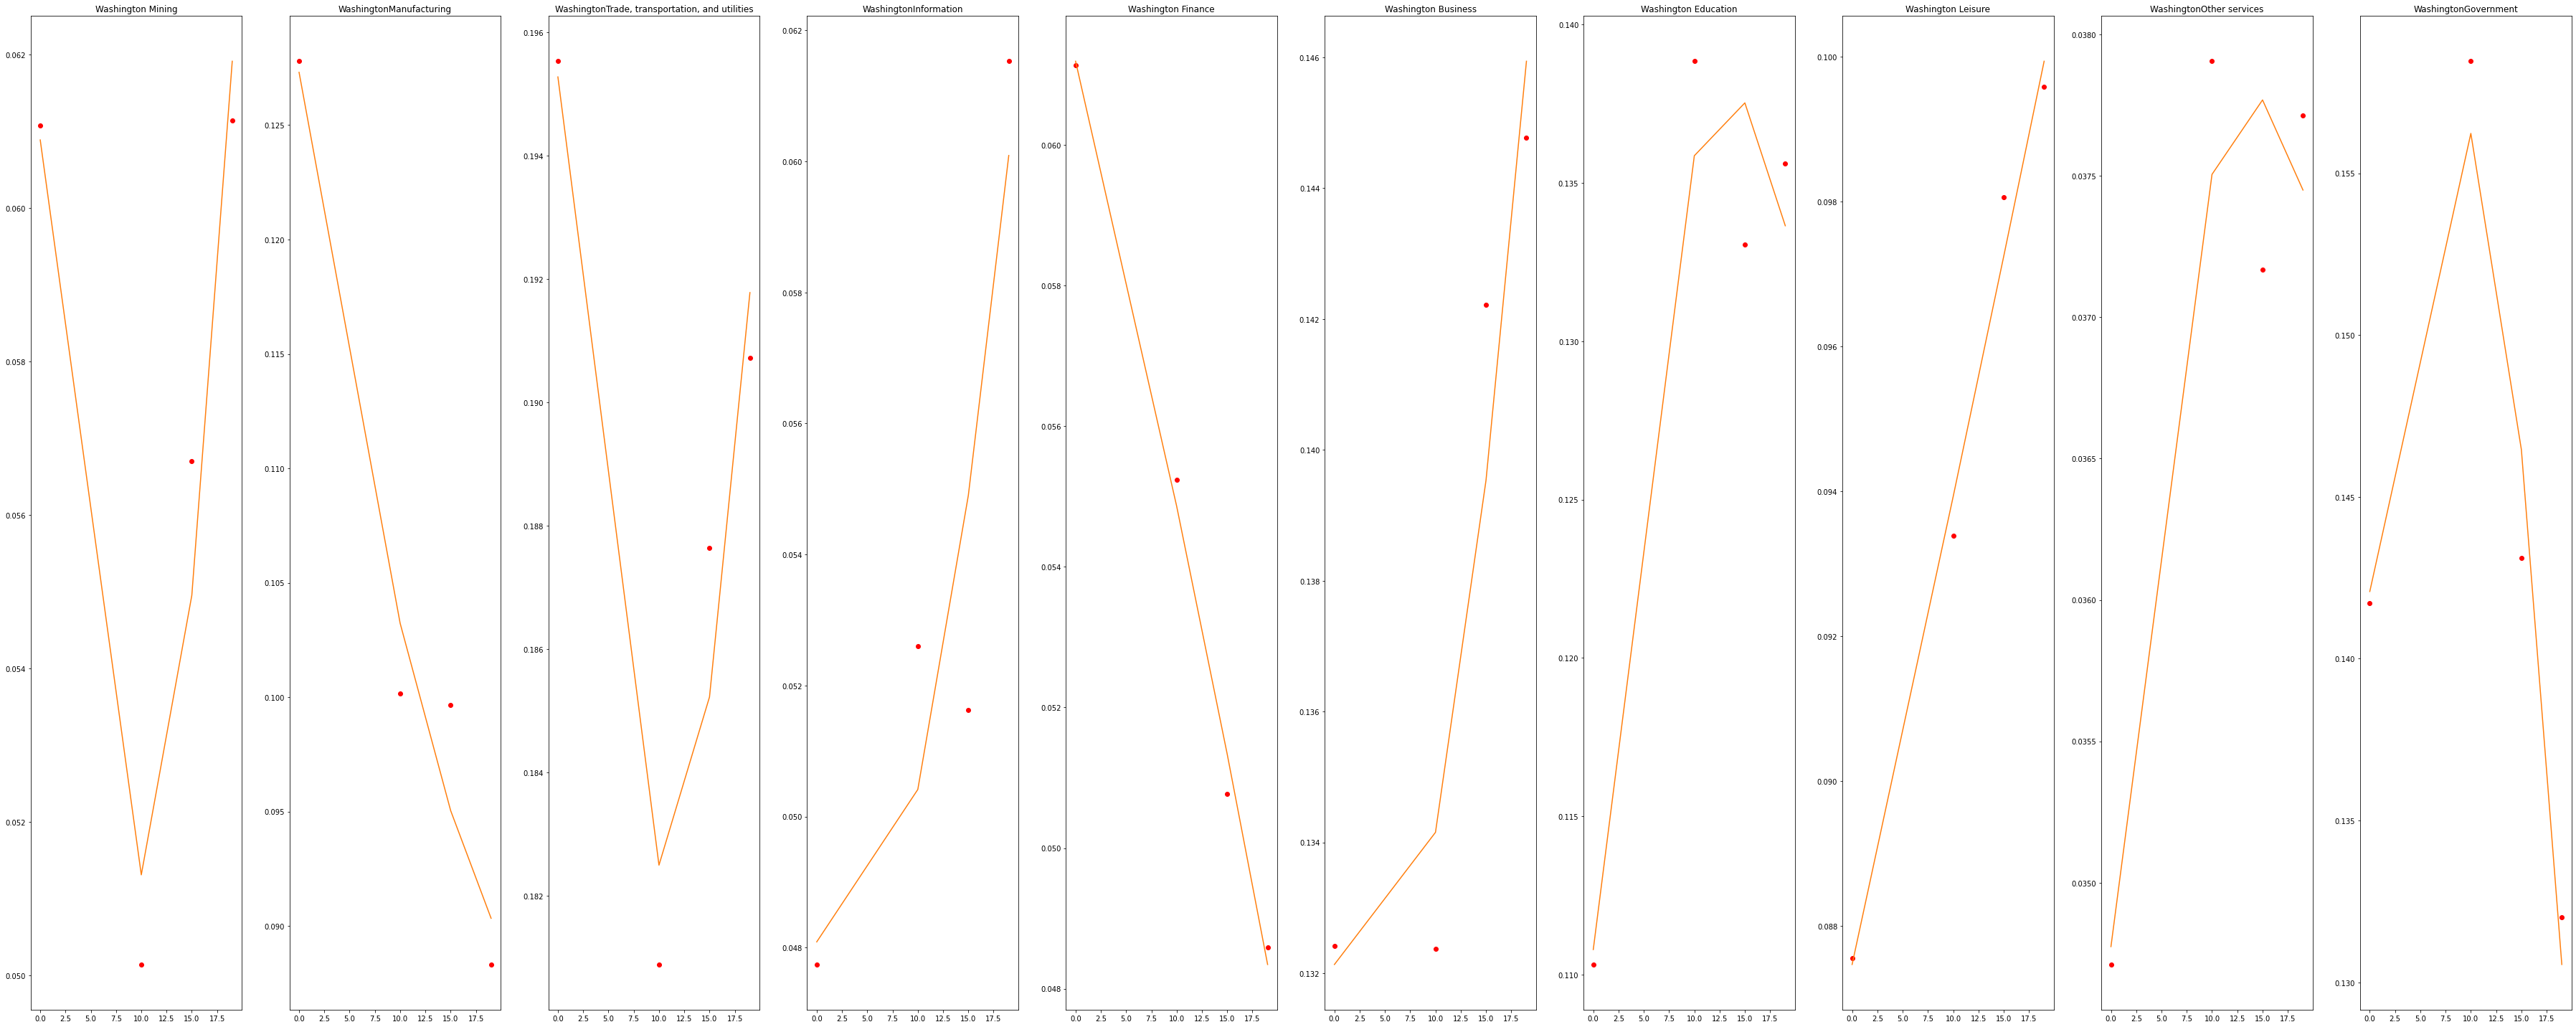

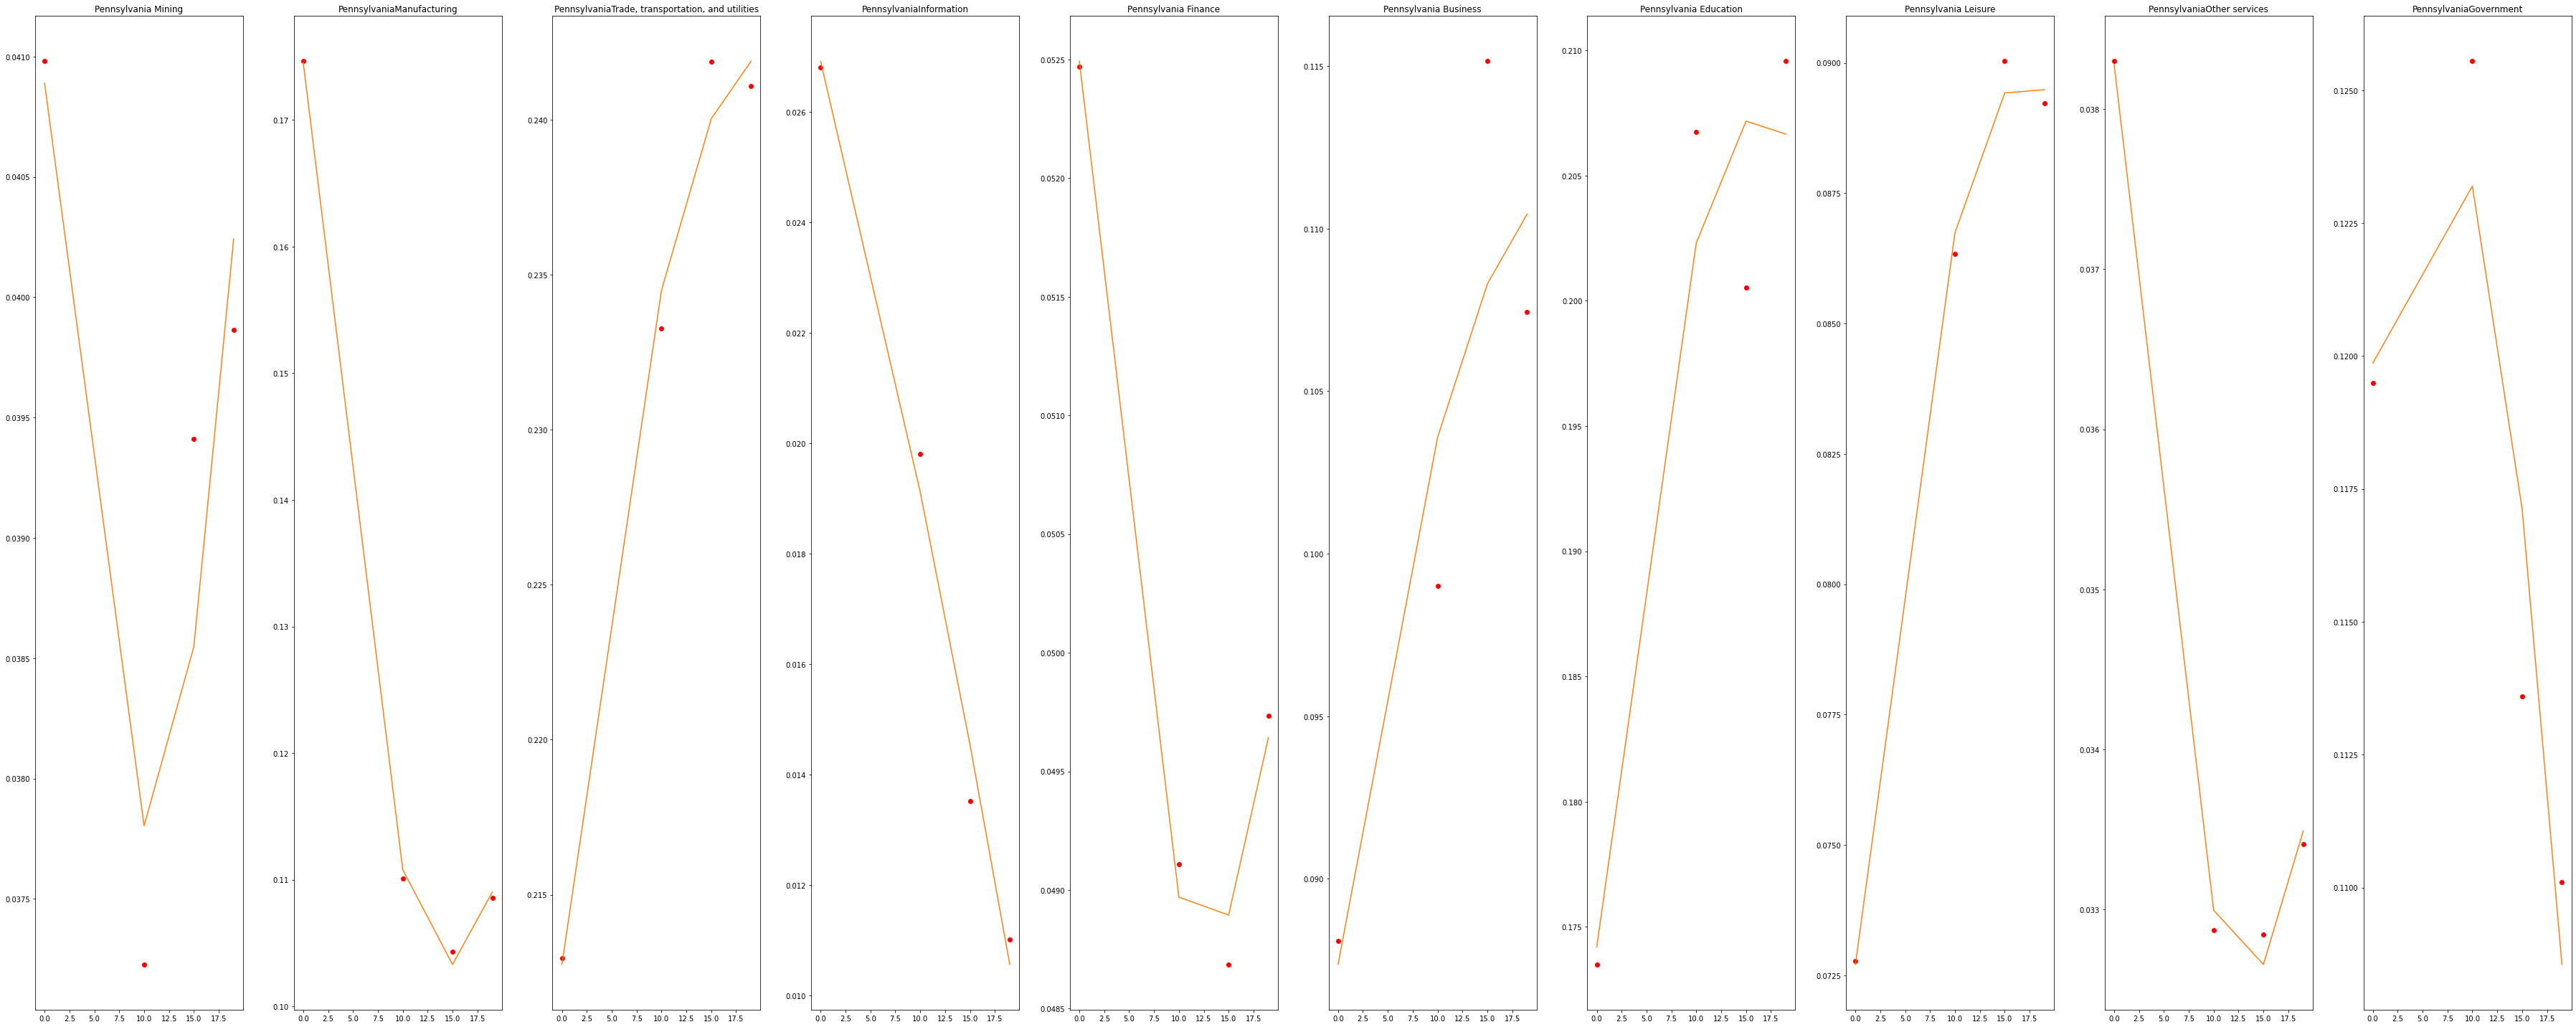

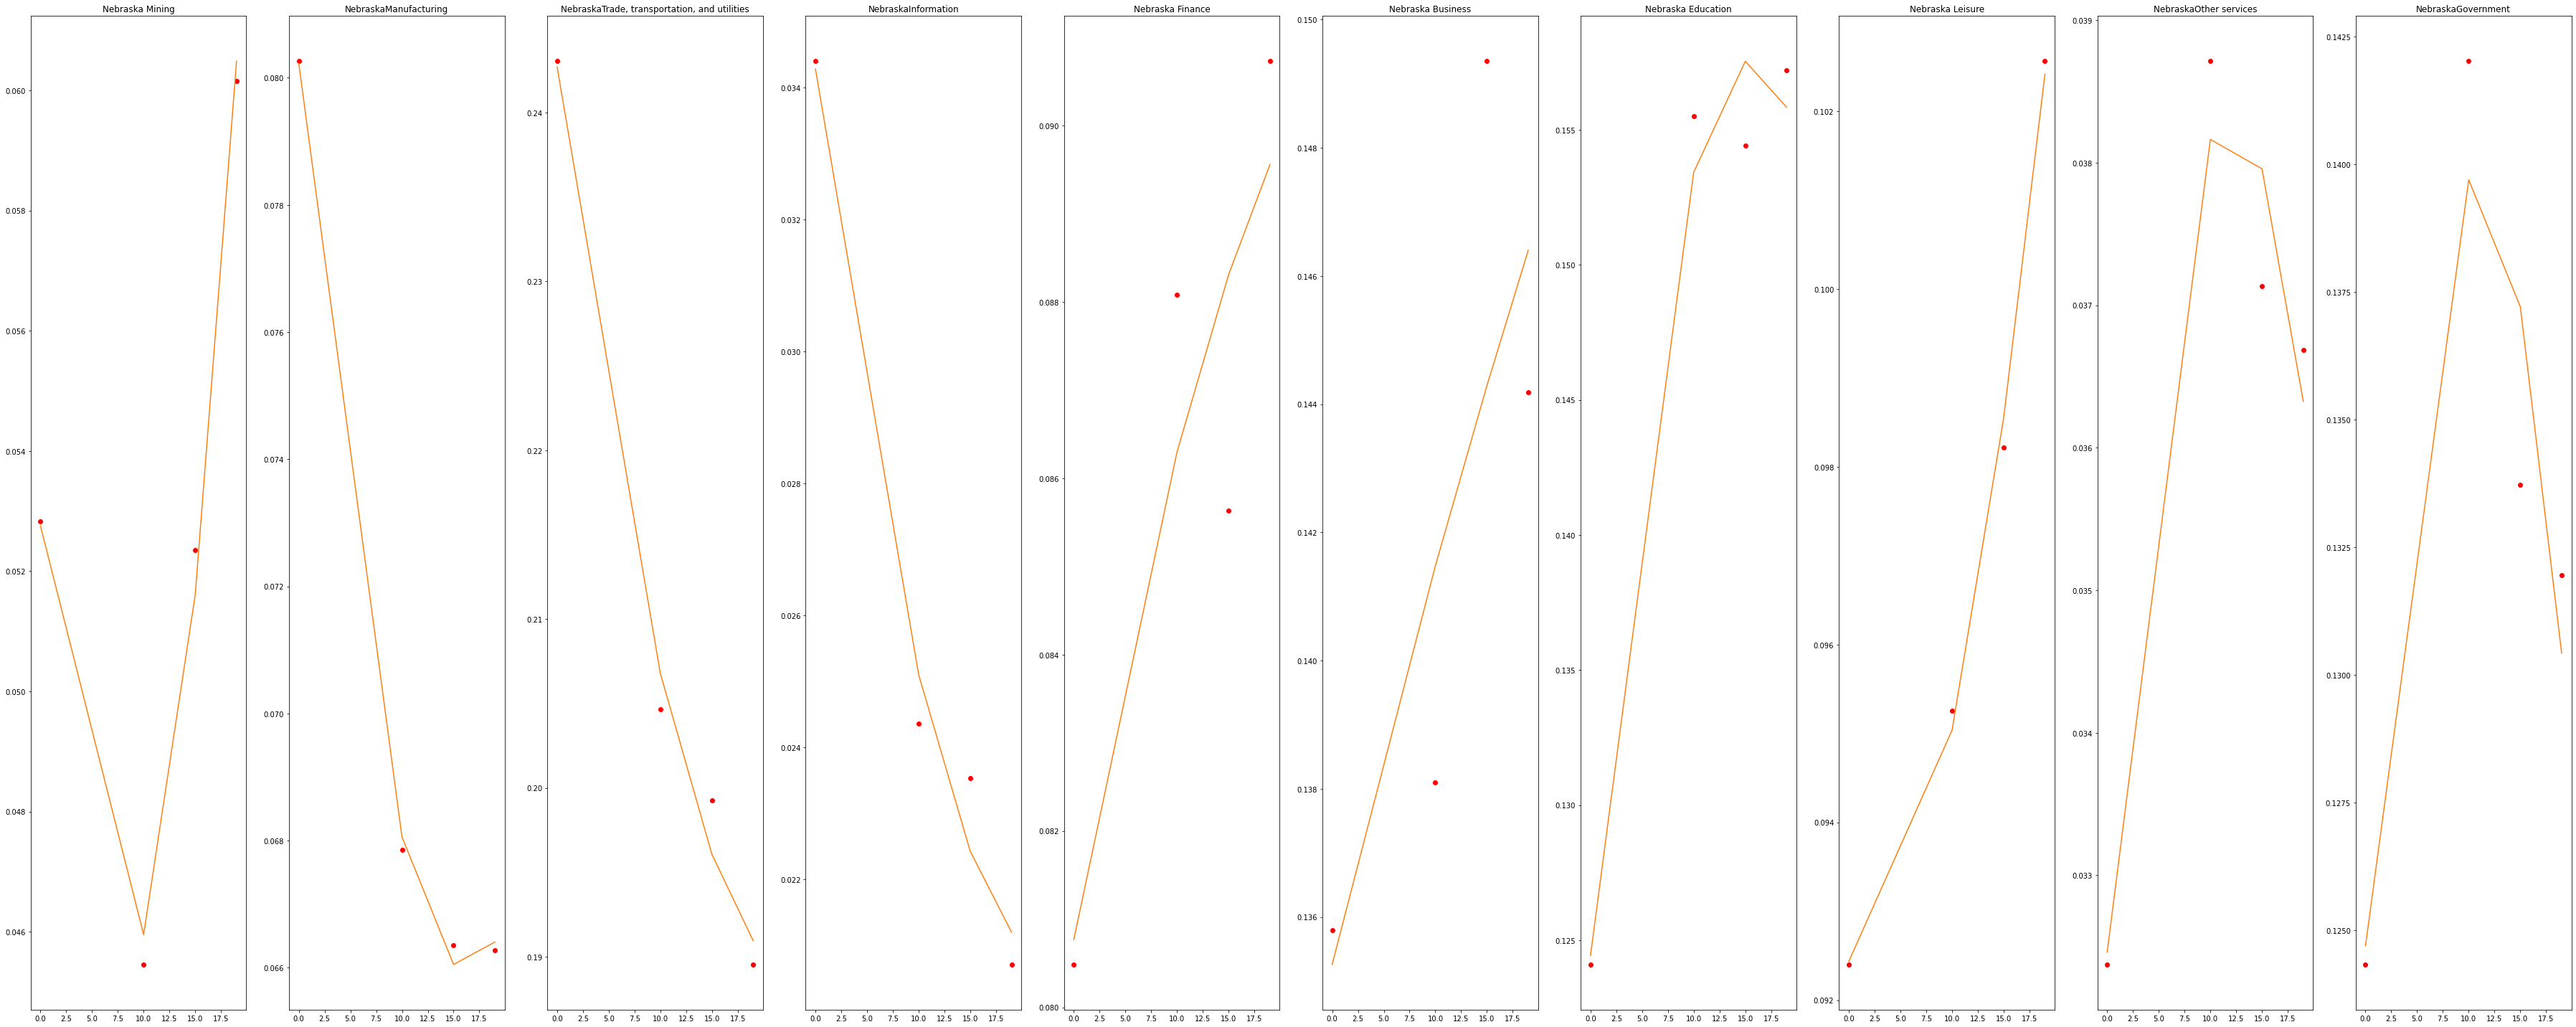

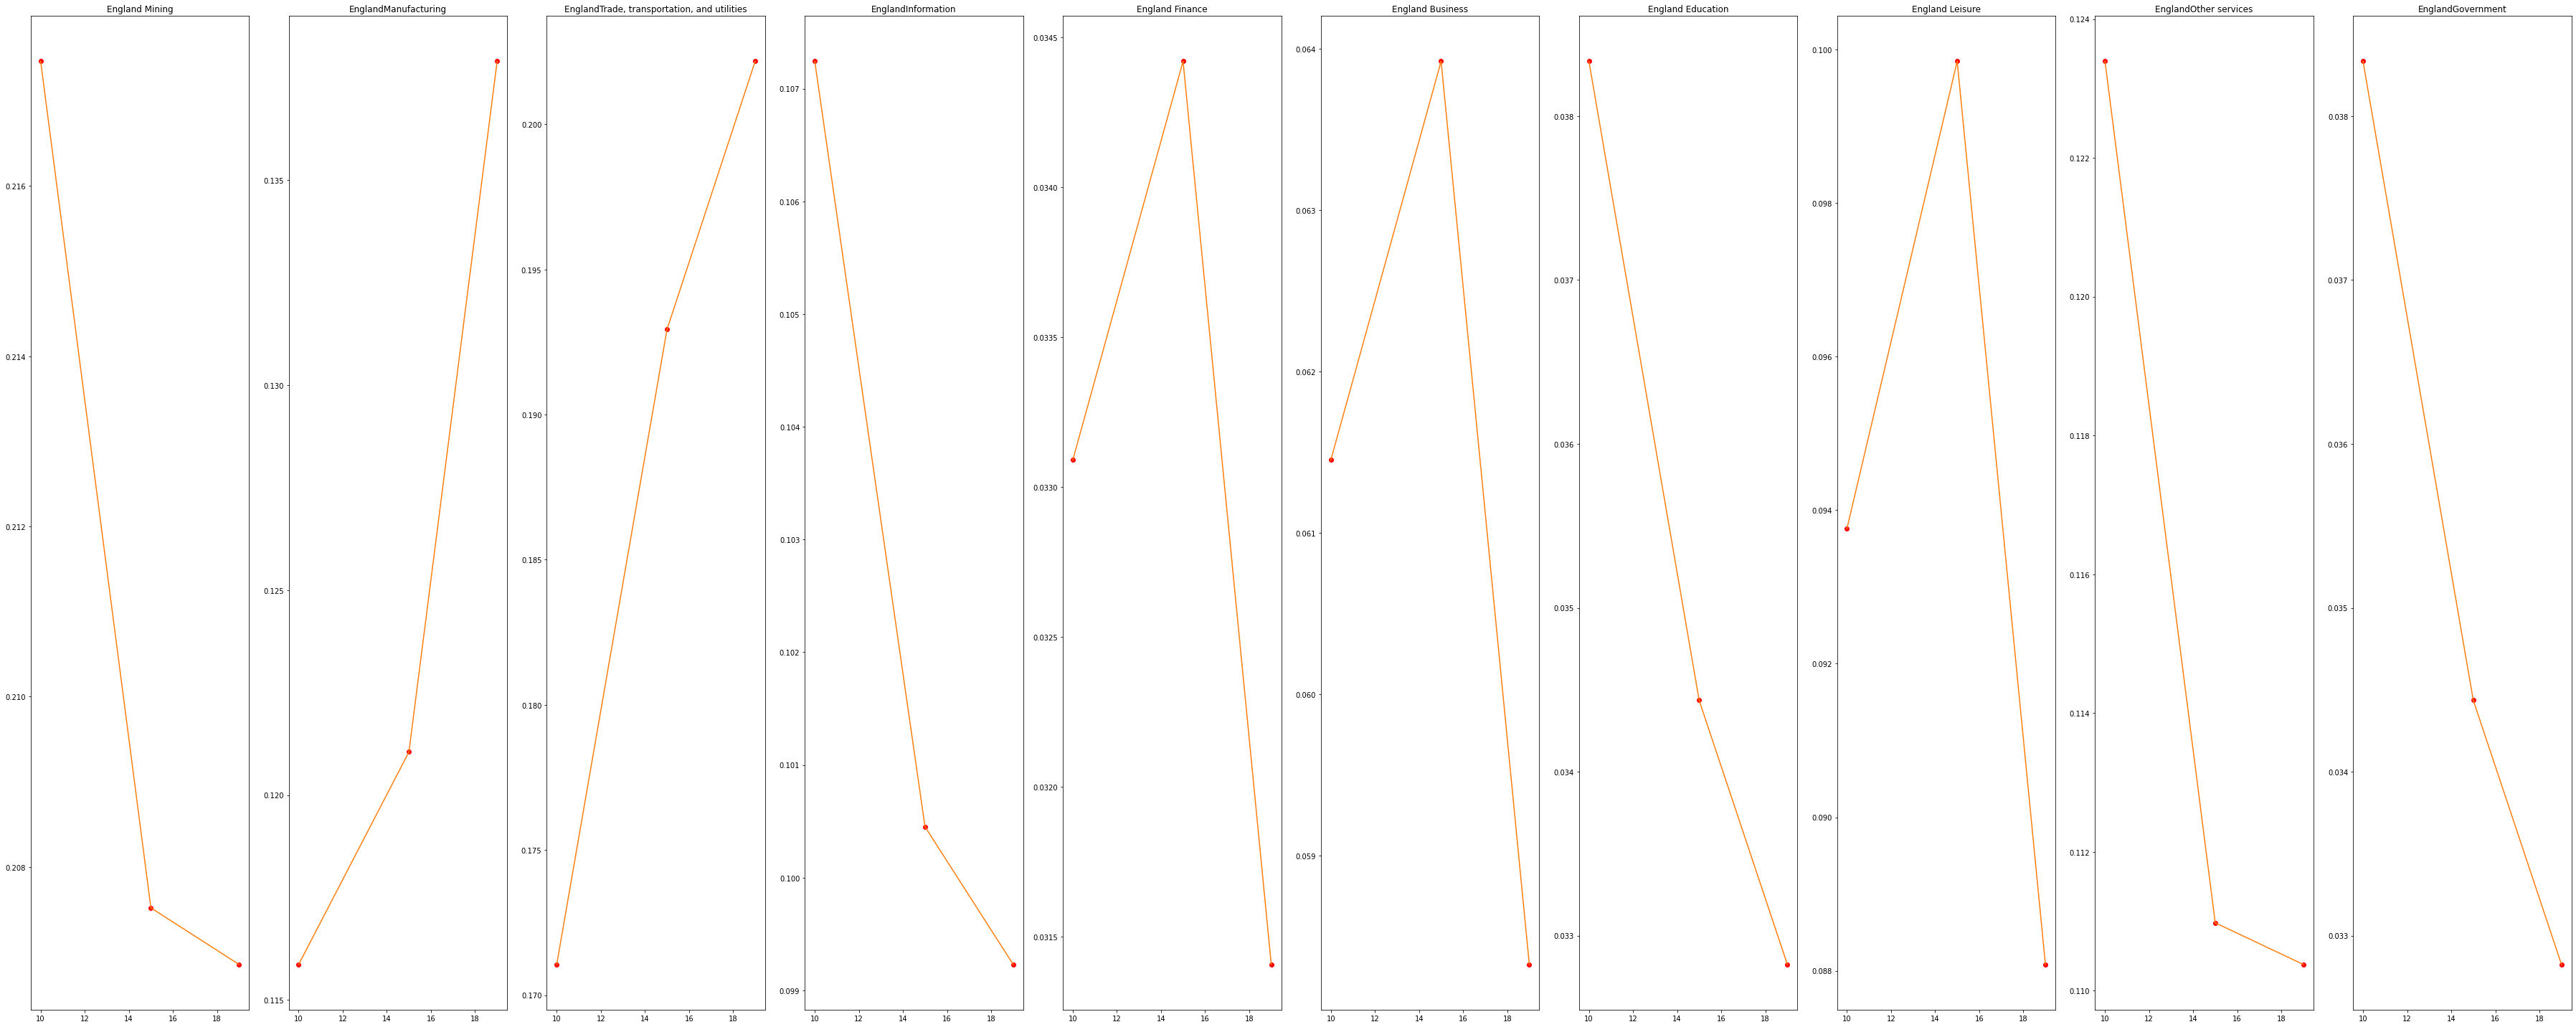

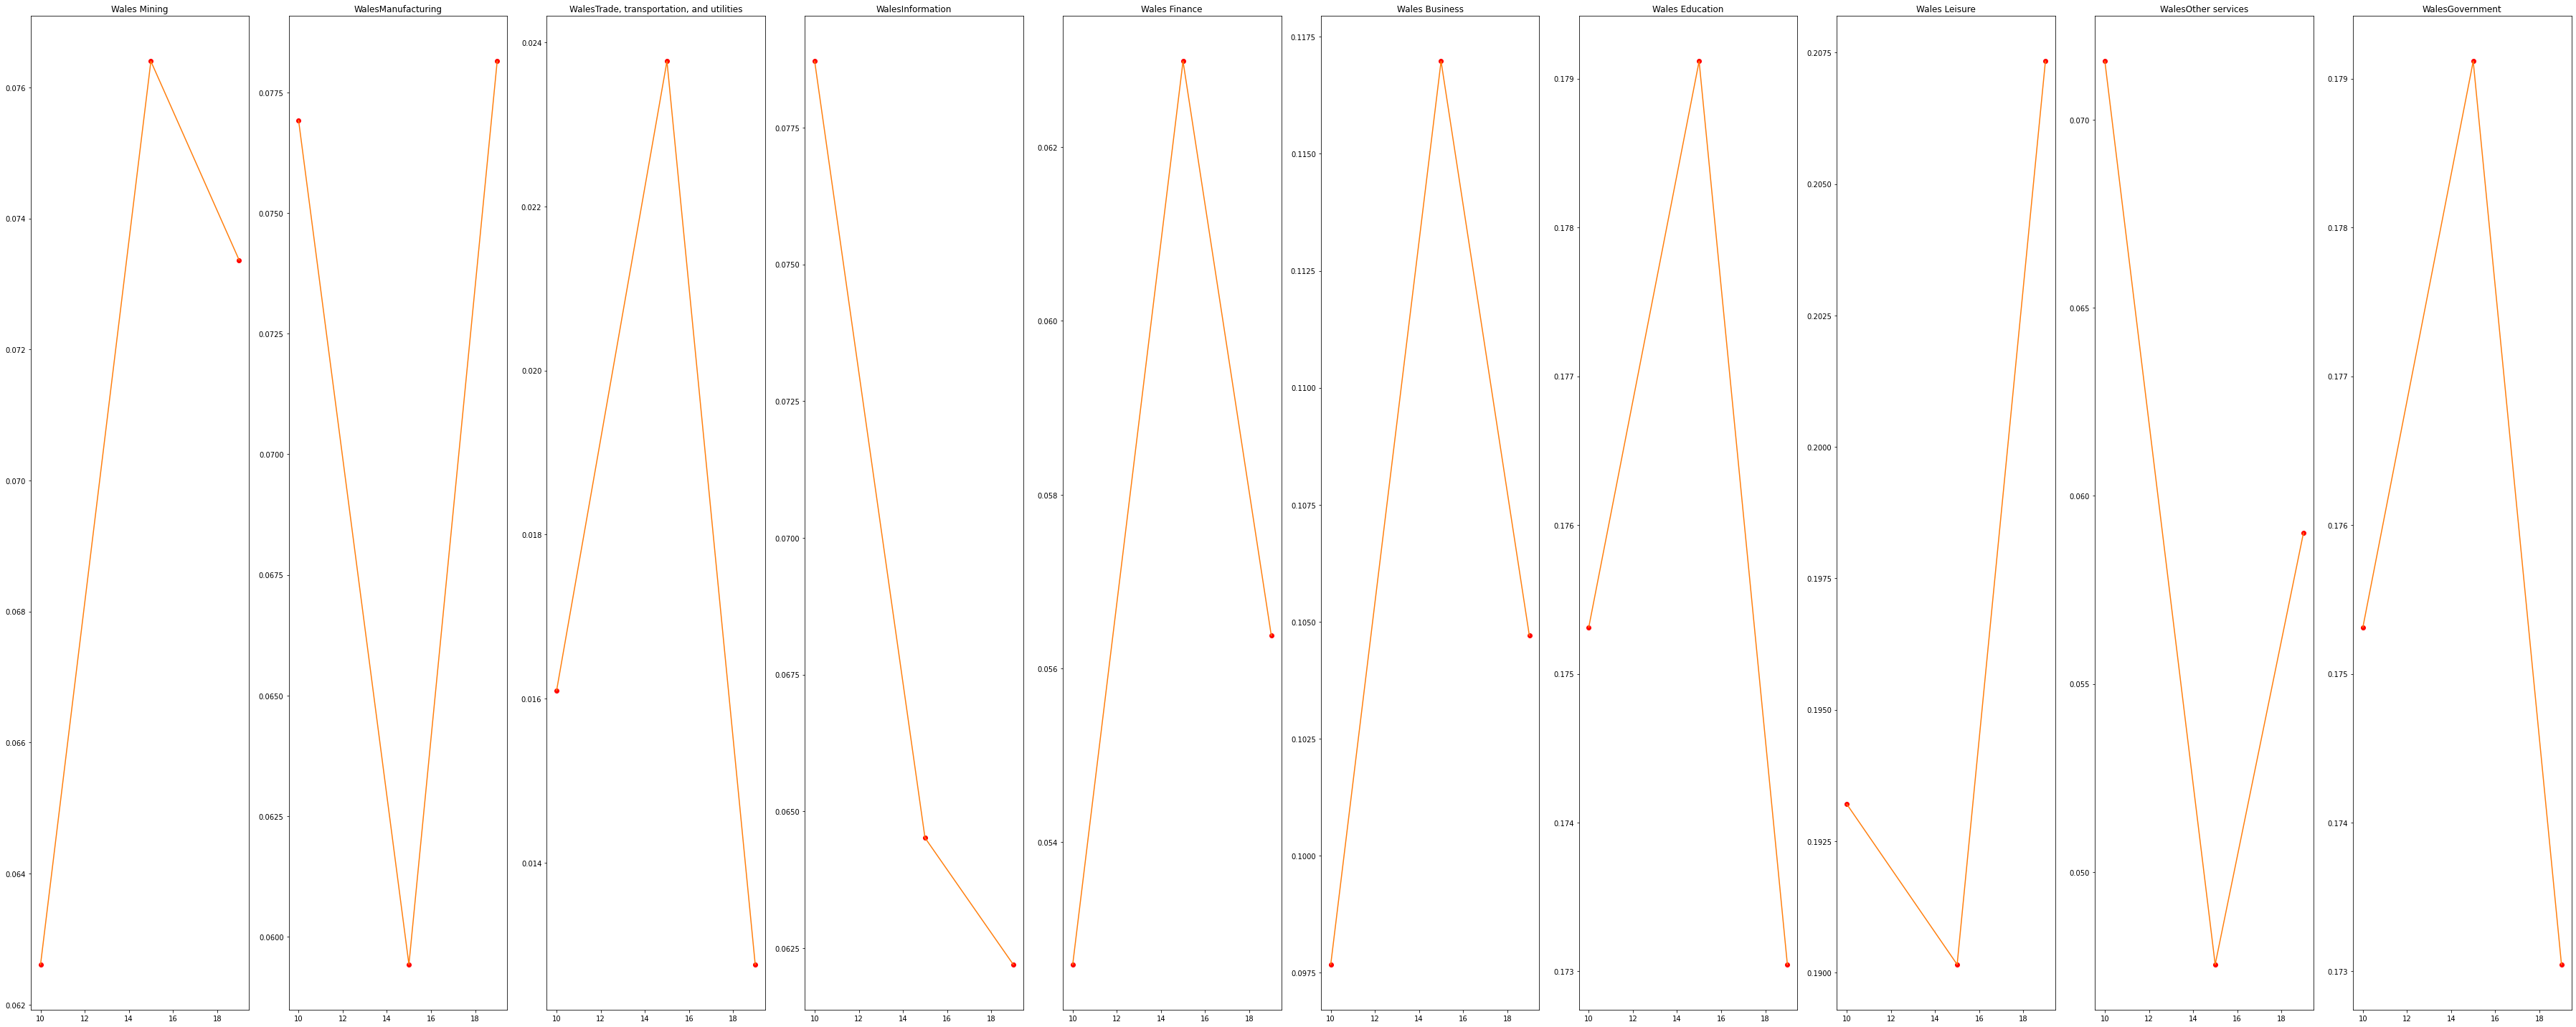

In [43]:
for city in range(len(employment_2000_2019)):
  fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(1, 10, figsize=(15,15), constrained_layout=True)
  axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
  
  fig.set_size_inches(50,20)

  column_2024 = []
  column_2027 = []
  for professions in (range(len(employment_2000_2019[city].T.columns))):
    if (professions != "Job Activity"):
      x_train = np.array(rows_2000_2019[city]).reshape(-1, 1)
      y_train = np.array(employment_2000_2019[city].T[professions].values[1:]).reshape(-1, 1)
      naming = employment_2000_2019[city].T[professions].values[0]

      poly_reg = PolynomialFeatures(degree=2)
      X_poly = poly_reg.fit_transform(x_train)
      pol_reg = LinearRegression()
      pol_reg.fit(X_poly, y_train)

      correct_axes = axes[professions]

      correct_axes.scatter(x_train, y_train, color='red')
      correct_axes.plot(x_train, pol_reg.predict(poly_reg.fit_transform(x_train)), 'tab:orange')

      if (naming == "Mining, logging, construction"): correct_axes.set_title(cities[city] + " Mining")
      elif (naming == "Trade, transportation, utilities"): correct_axes.set_title(cities[city] + " Trade")
      elif (naming == "Financial activities"): correct_axes.set_title(cities[city] + " Finance")
      elif (naming == "Professional and business services"): correct_axes.set_title(cities[city] + " Business")
      elif (naming == "Education and health services"): correct_axes.set_title(cities[city] + " Education")
      elif (naming == "Leisure and hospitality"): correct_axes.set_title(cities[city] + " Leisure")
      elif (naming == "Other Services"): correct_axes.set_title(cities[city] + " Other")
      else: correct_axes.set_title(cities[city] + naming)

      column_2024.append(pol_reg.predict(poly_reg.fit_transform([[24]]))[0][0])
      column_2027.append(pol_reg.predict(poly_reg.fit_transform([[27]]))[0][0])
      # axs[city,professions].xlabel('Year')
      # axs[city,professions].ylabel('Percentage')

  print(column_2024)
  employment_2000_2019[city]['24'] = column_2024
  employment_2000_2019[city]['27'] = column_2027
  plt.tight_layout()

In [47]:
for city in range(len(employment_2000_2021)):
  fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(1, 10, figsize=(15, 15), gridspec_kw={'width_ratios': [5, 5], 'height_ratios': [5, 5], 'wspace': 0.2,'hspace': 0.2})
  axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

  fig.set_size_inches(50,20)

  column_2024 = []
  column_2027 = []
  for professions in (range(len(employment_2000_2021[city].T.columns))):
    if (professions != "Job Activity"):
      x_train = np.array(rows_2000_2021[city]).reshape(-1, 1)
      y_train = np.array(employment_2000_2021[city].T[professions].values[1:]).reshape(-1, 1)
      naming = employment_2000_2021[city].T[professions].values[0]

      poly_reg = PolynomialFeatures(degree=2)
      X_poly = poly_reg.fit_transform(x_train)
      pol_reg = LinearRegression()
      pol_reg.fit(X_poly, y_train)

      correct_axes = axes[professions]

      correct_axes.scatter(x_train, y_train, color='red')
      correct_axes.plot(x_train, pol_reg.predict(poly_reg.fit_transform(x_train)), 'tab:orange')

      if (naming == "Mining, logging, construction"): correct_axes.set_title(cities[city] + " Mining")
      elif (naming == "Trade, transportation, utilities"): correct_axes.set_title(cities[city] + " Trade")
      elif (naming == "Financial activities"): correct_axes.set_title(cities[city] + " Finance")
      elif (naming == "Professional and business services"): correct_axes.set_title(cities[city] + " Business")
      elif (naming == "Education and health services"): correct_axes.set_title(cities[city] + " Education")
      elif (naming == "Leisure and hospitality"): correct_axes.set_title(cities[city] + " Leisure")
      elif (naming == "Other Services"): correct_axes.set_title(cities[city] + " Other")
      else: correct_axes.set_title(cities[city] + naming)

      column_2024.append(pol_reg.predict(poly_reg.fit_transform([[24]]))[0][0])
      column_2027.append(pol_reg.predict(poly_reg.fit_transform([[27]]))[0][0])
      # axs[city,professions].xlabel('Year')
      # axs[city,professions].ylabel('Percentage')

  print(column_2024)
  employment_2000_2021[city]['24'] = column_2024
  employment_2000_2021[city]['27'] = column_2027
  plt.tight_layout()

ValueError: ignored

<Figure size 1080x1080 with 0 Axes>

[0.022452239979800392, 0.08407676010404275, 0.12871964151425797, 0.16776767866018294, 0.042230013668619726, 0.24827133786428734, 0.05670037082434587, 0.23284578829137814, 0.03373393915812581, -0.01679777006503258]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[0.053532554830298396, 0.09860118448580873, 0.2271029606052477, 0.0074133000192670145, 0.02536154802244972, 0.1332836263456283, 0.13535778542787114, 0.17759594872411144, 0.05100452641837139, 0.09074656512094337]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[0.04267373103994432, 0.055663601835729604, 0.20435764872992224, 0.01661592693302225, 0.030639673581553062, 0.12887163789389677, 0.14335688055717422, 0.23831728787734896, 0.04340578301598236, 0.09609782853544668]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[0.055850833933688726, 0.006922189257556166, 0.18513645919116972, 0.07409924503580279, 0.11965084038904106, 0.22220870357964229, 0.0784528787285299, 0.03721110850716225, 0.10582340165673787, 0.11464433972067156]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[0.3411082760543458, 0.27701842126491183, 0.024055763349649872, 0.17947607584743475, -0.15473491039852405, -0.28736483359731047, -0.15090468265524848, 0.9242173049790239, -0.0019667321890259326, -0.15090468265524848]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


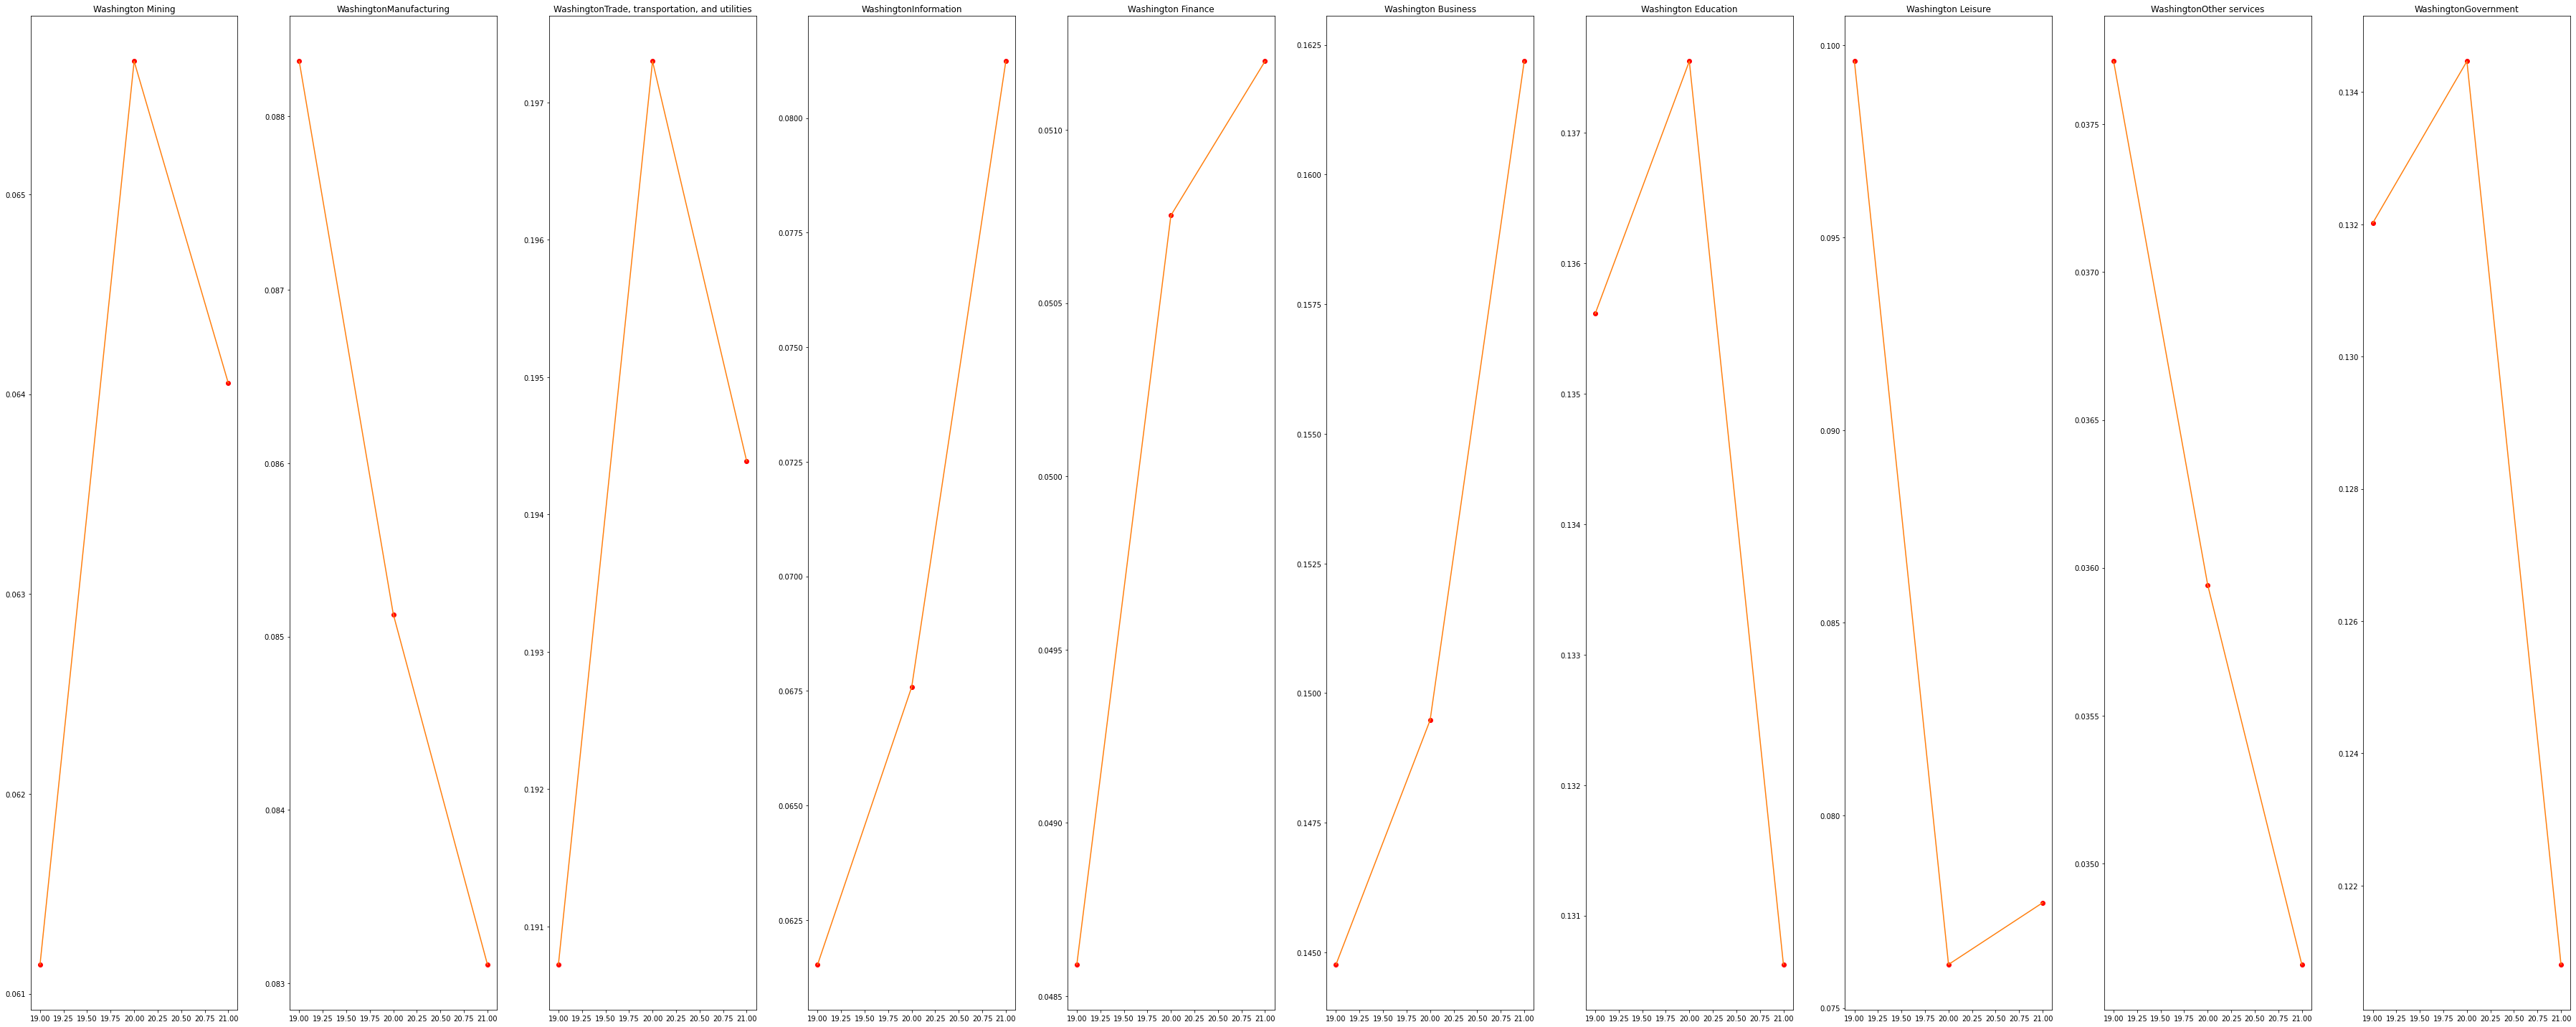

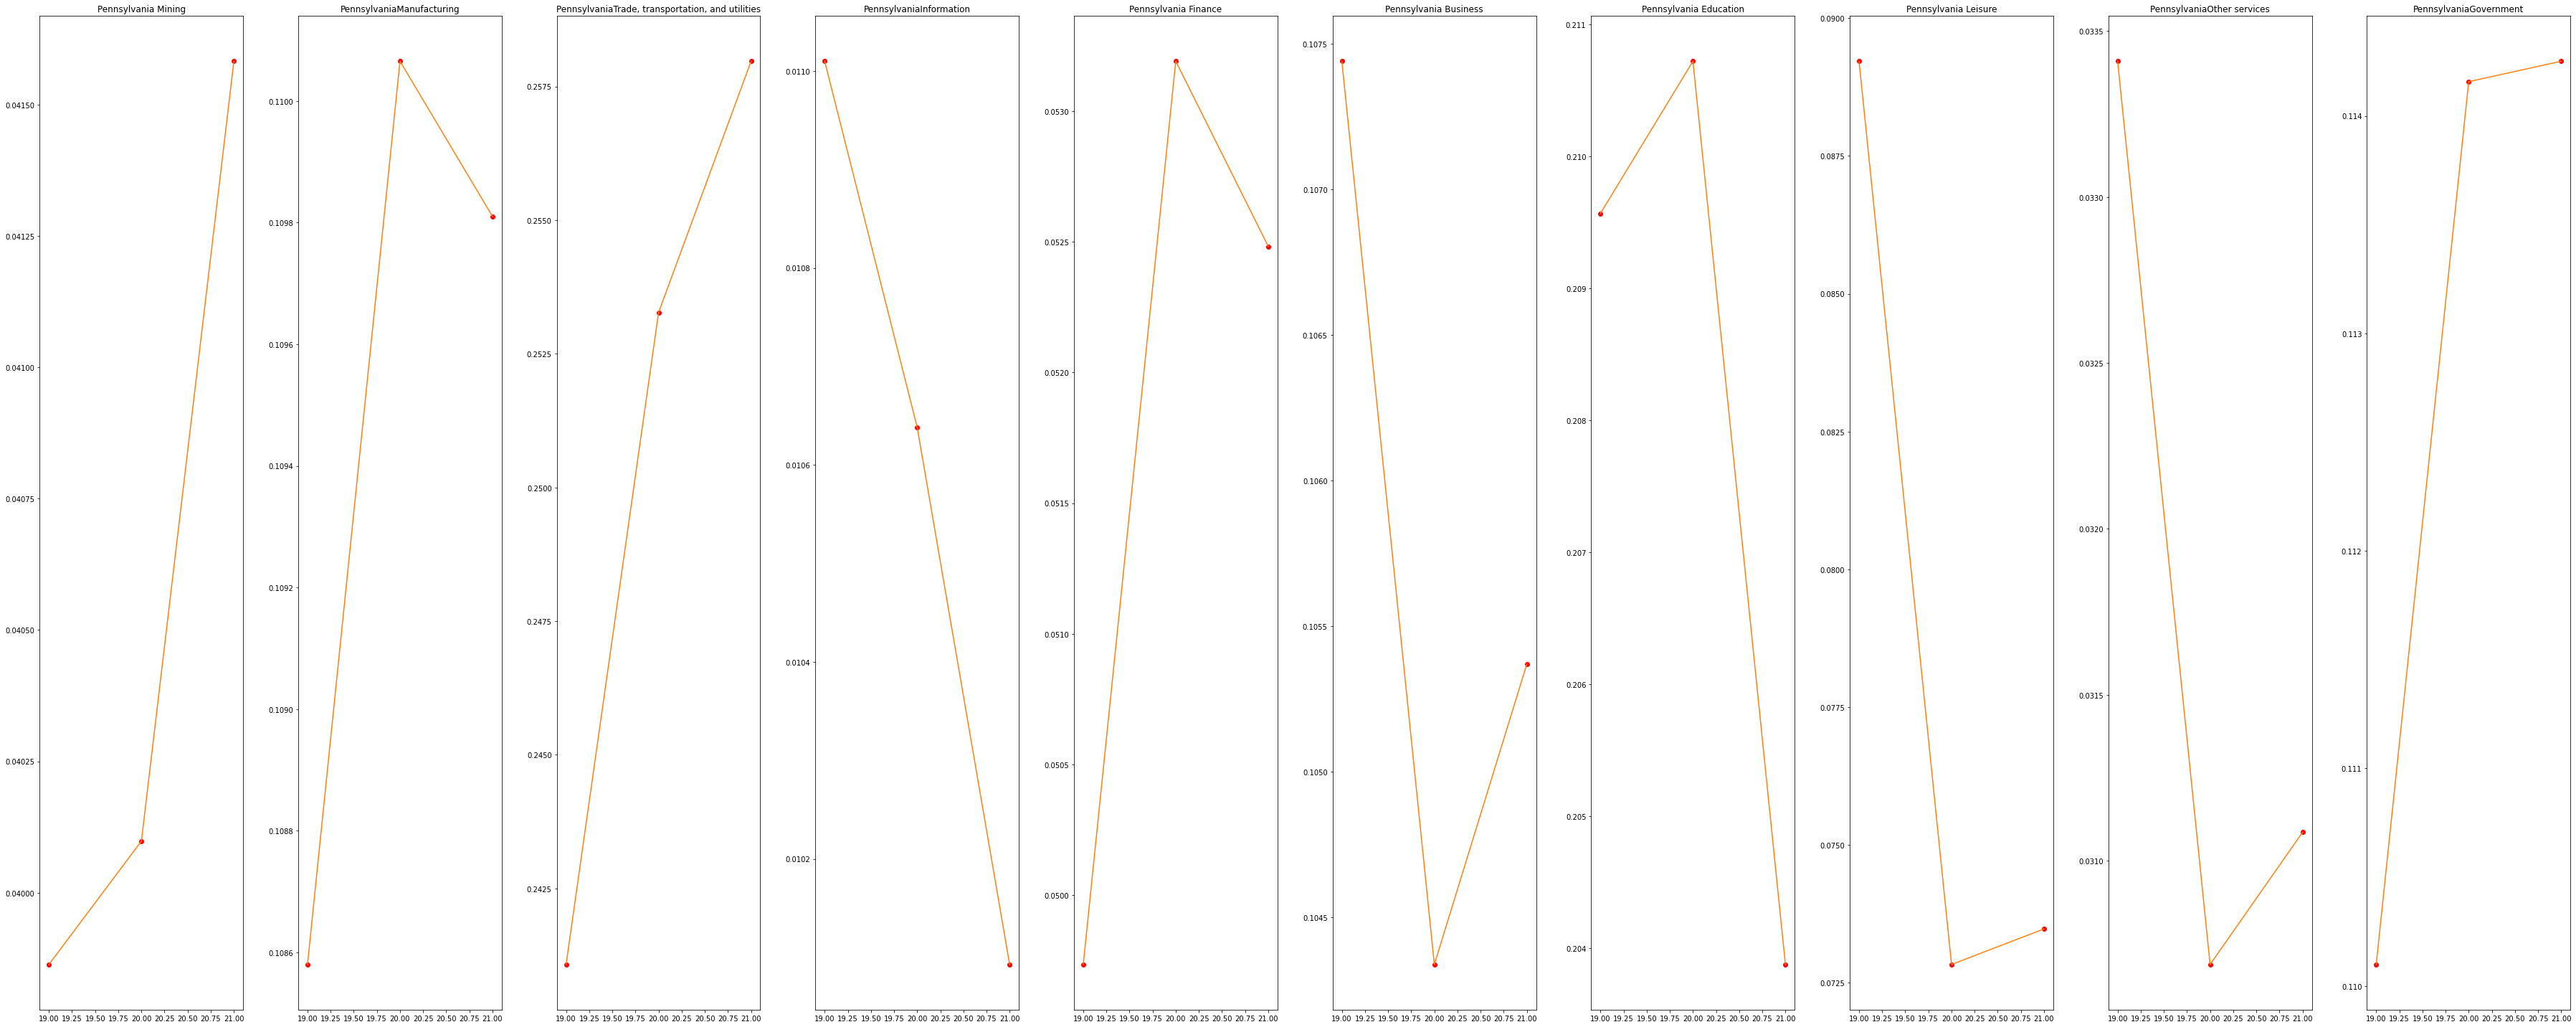

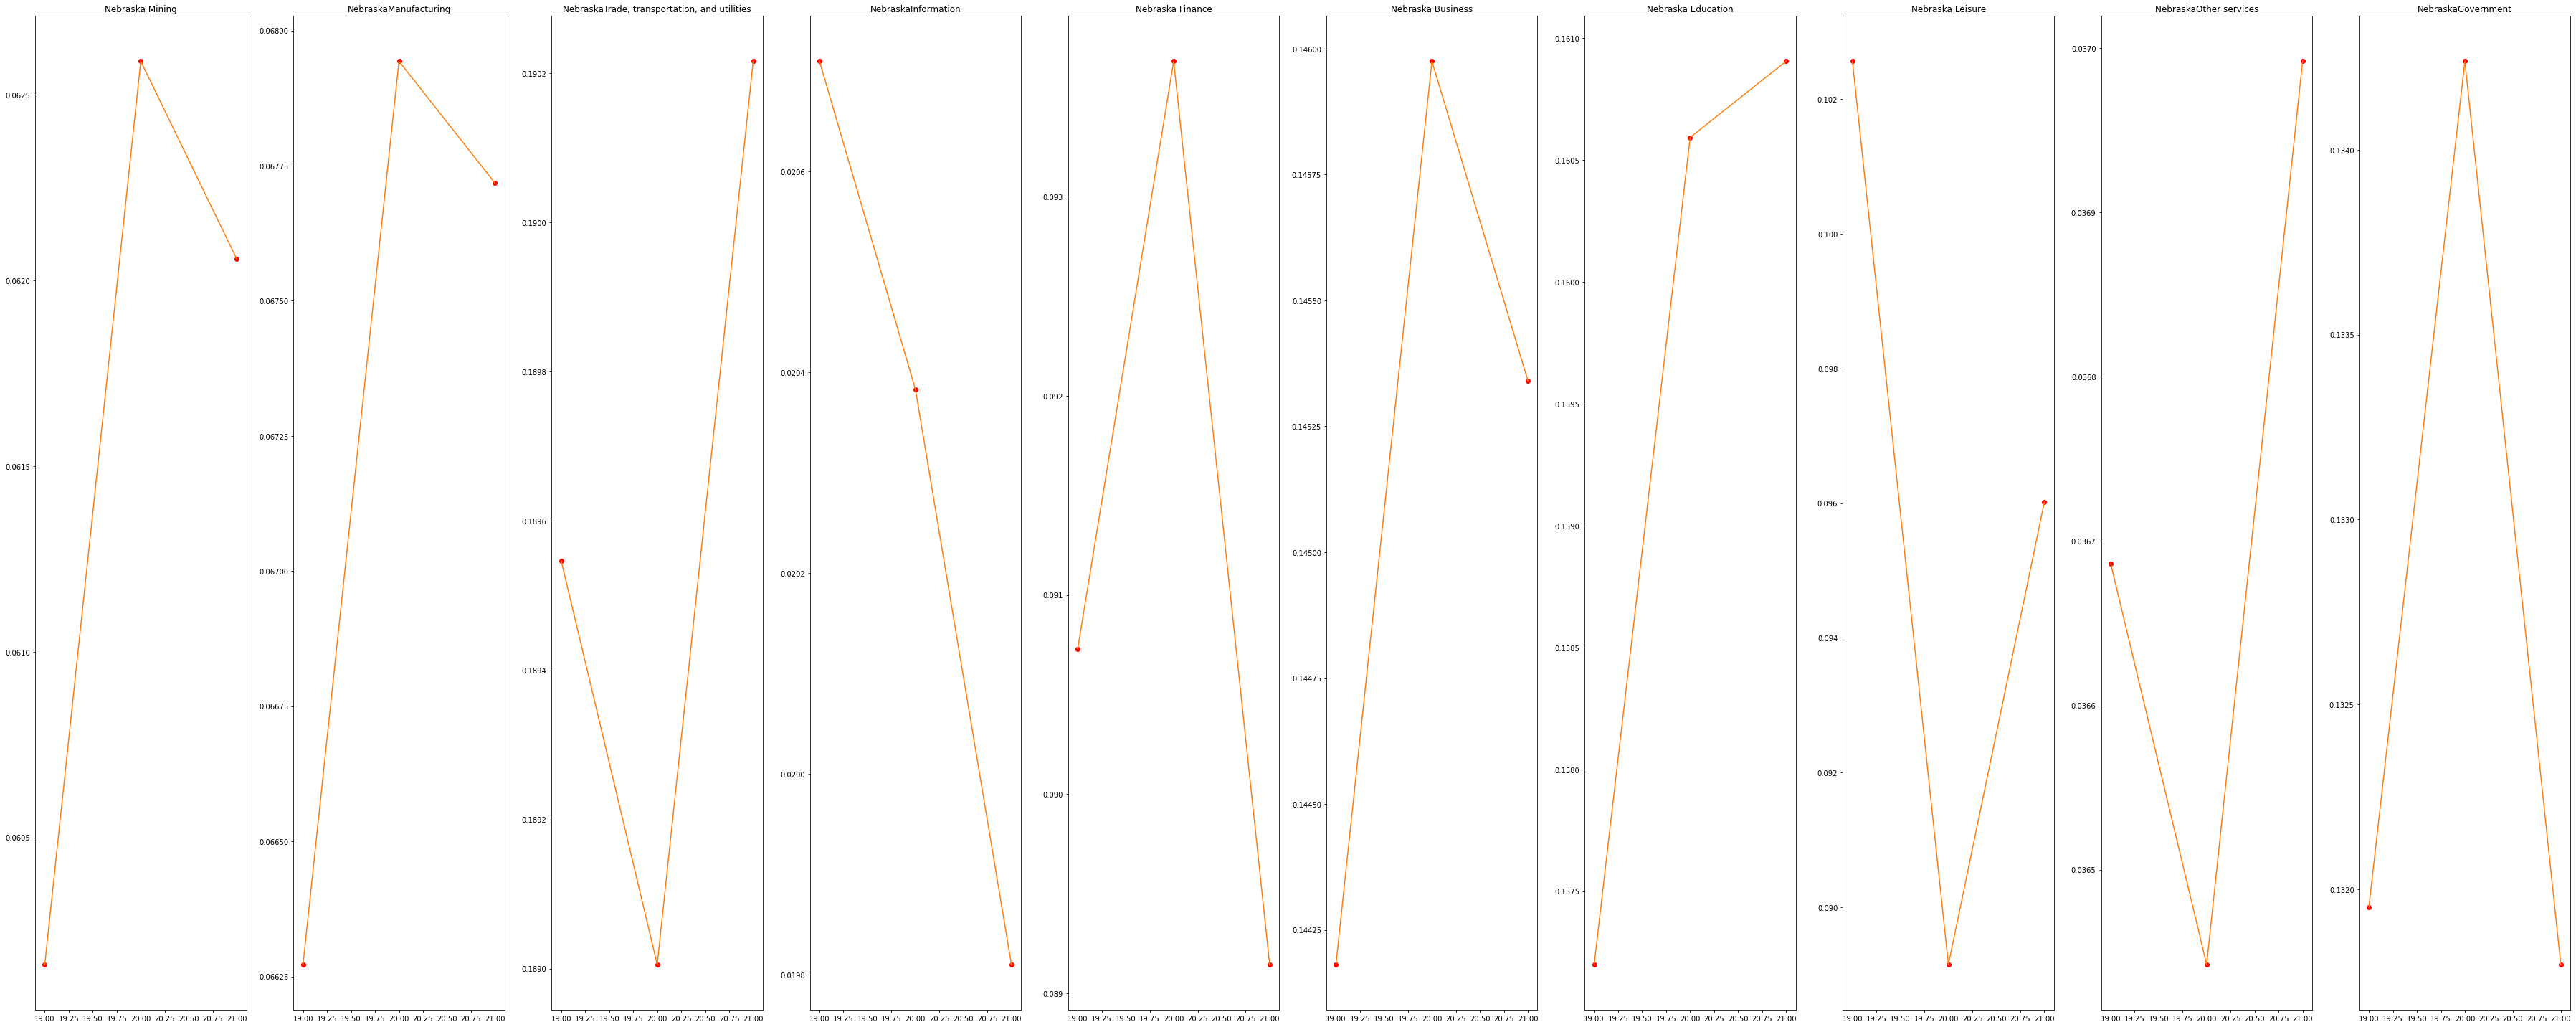

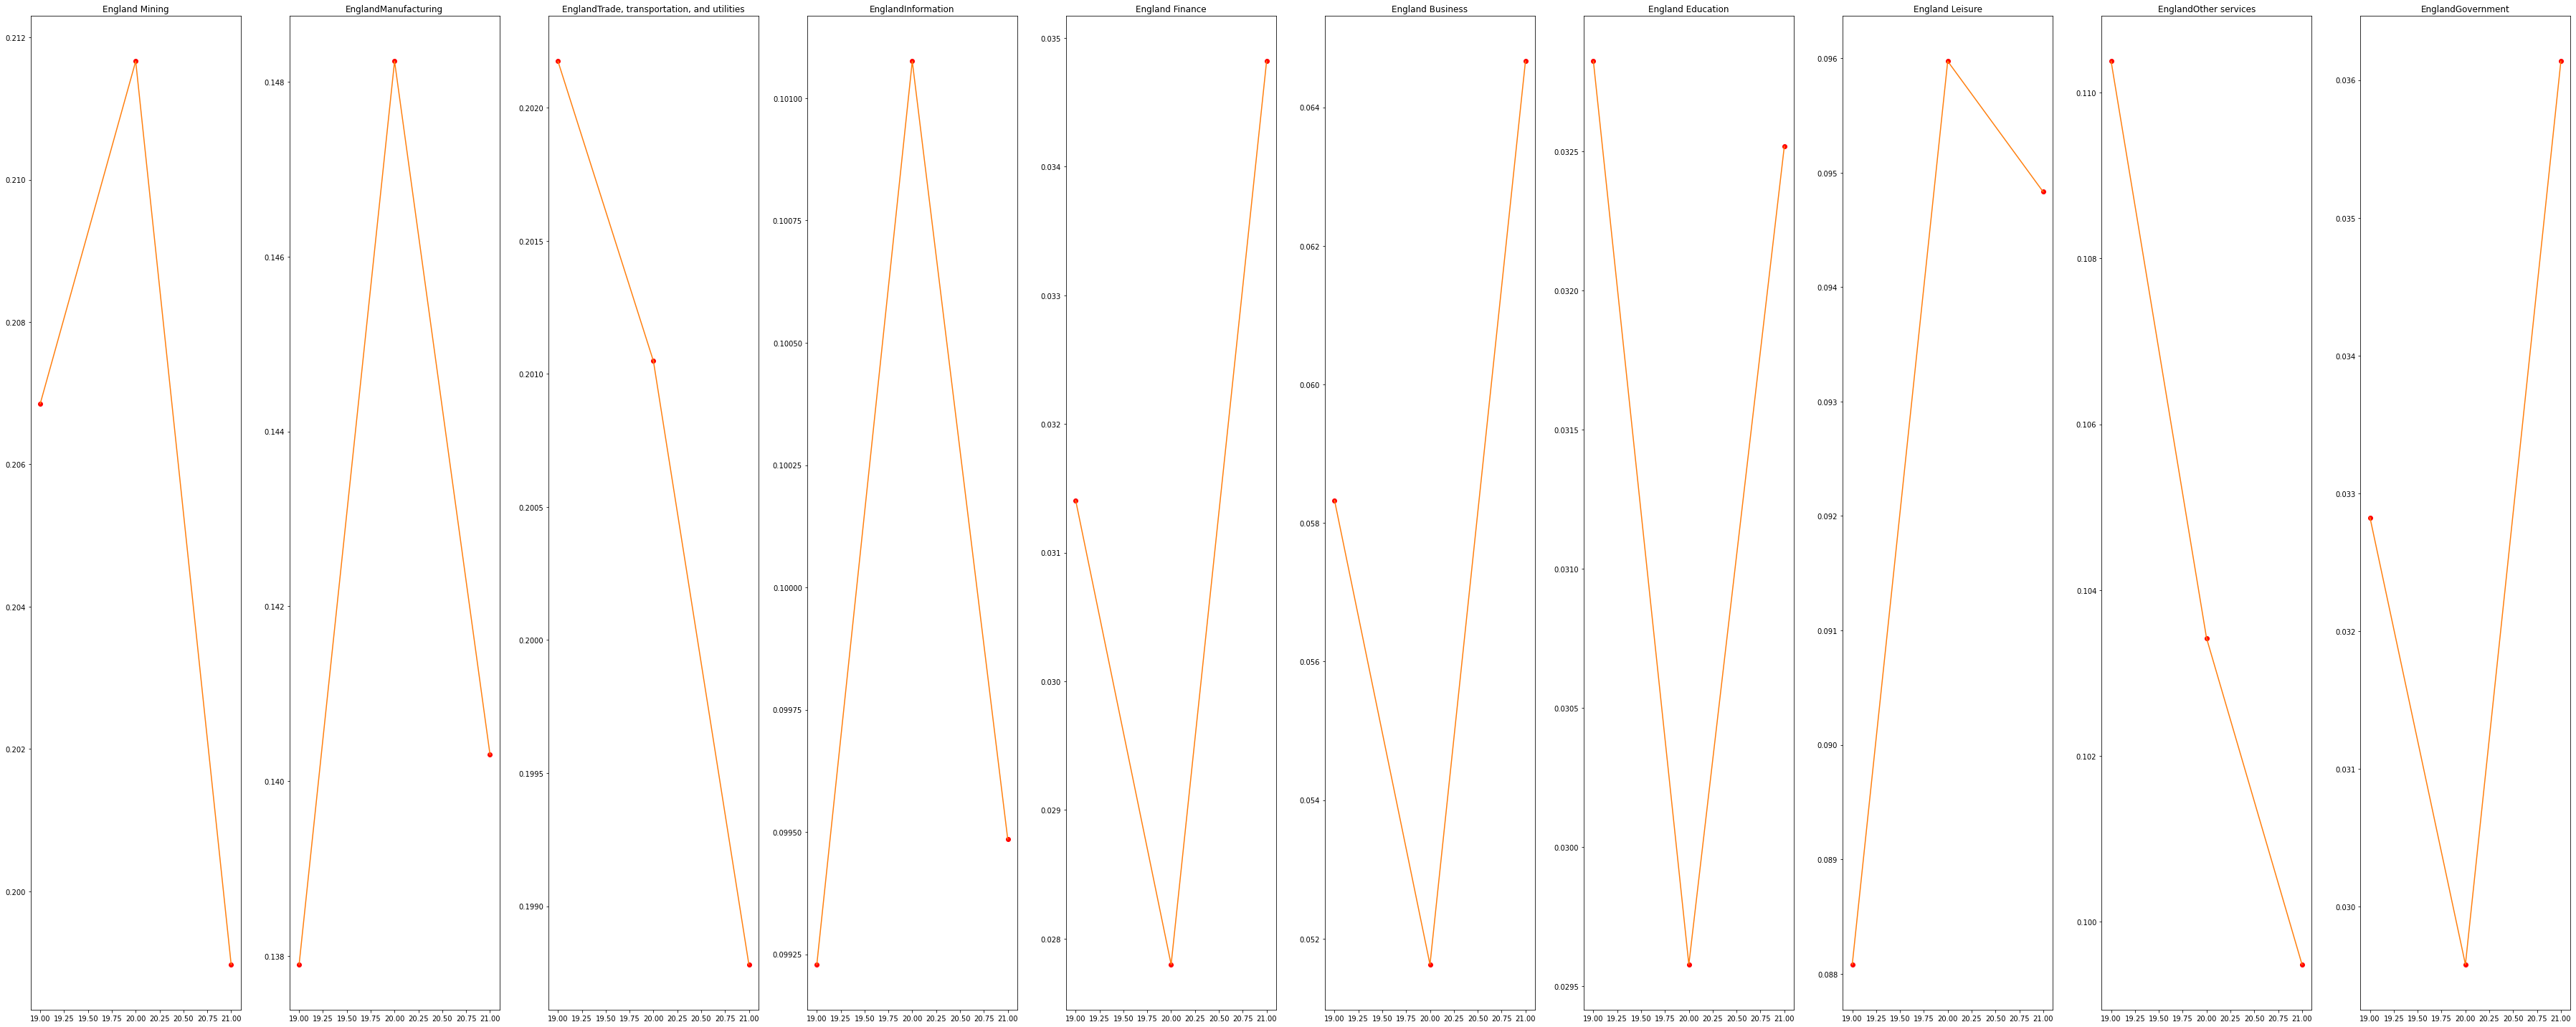

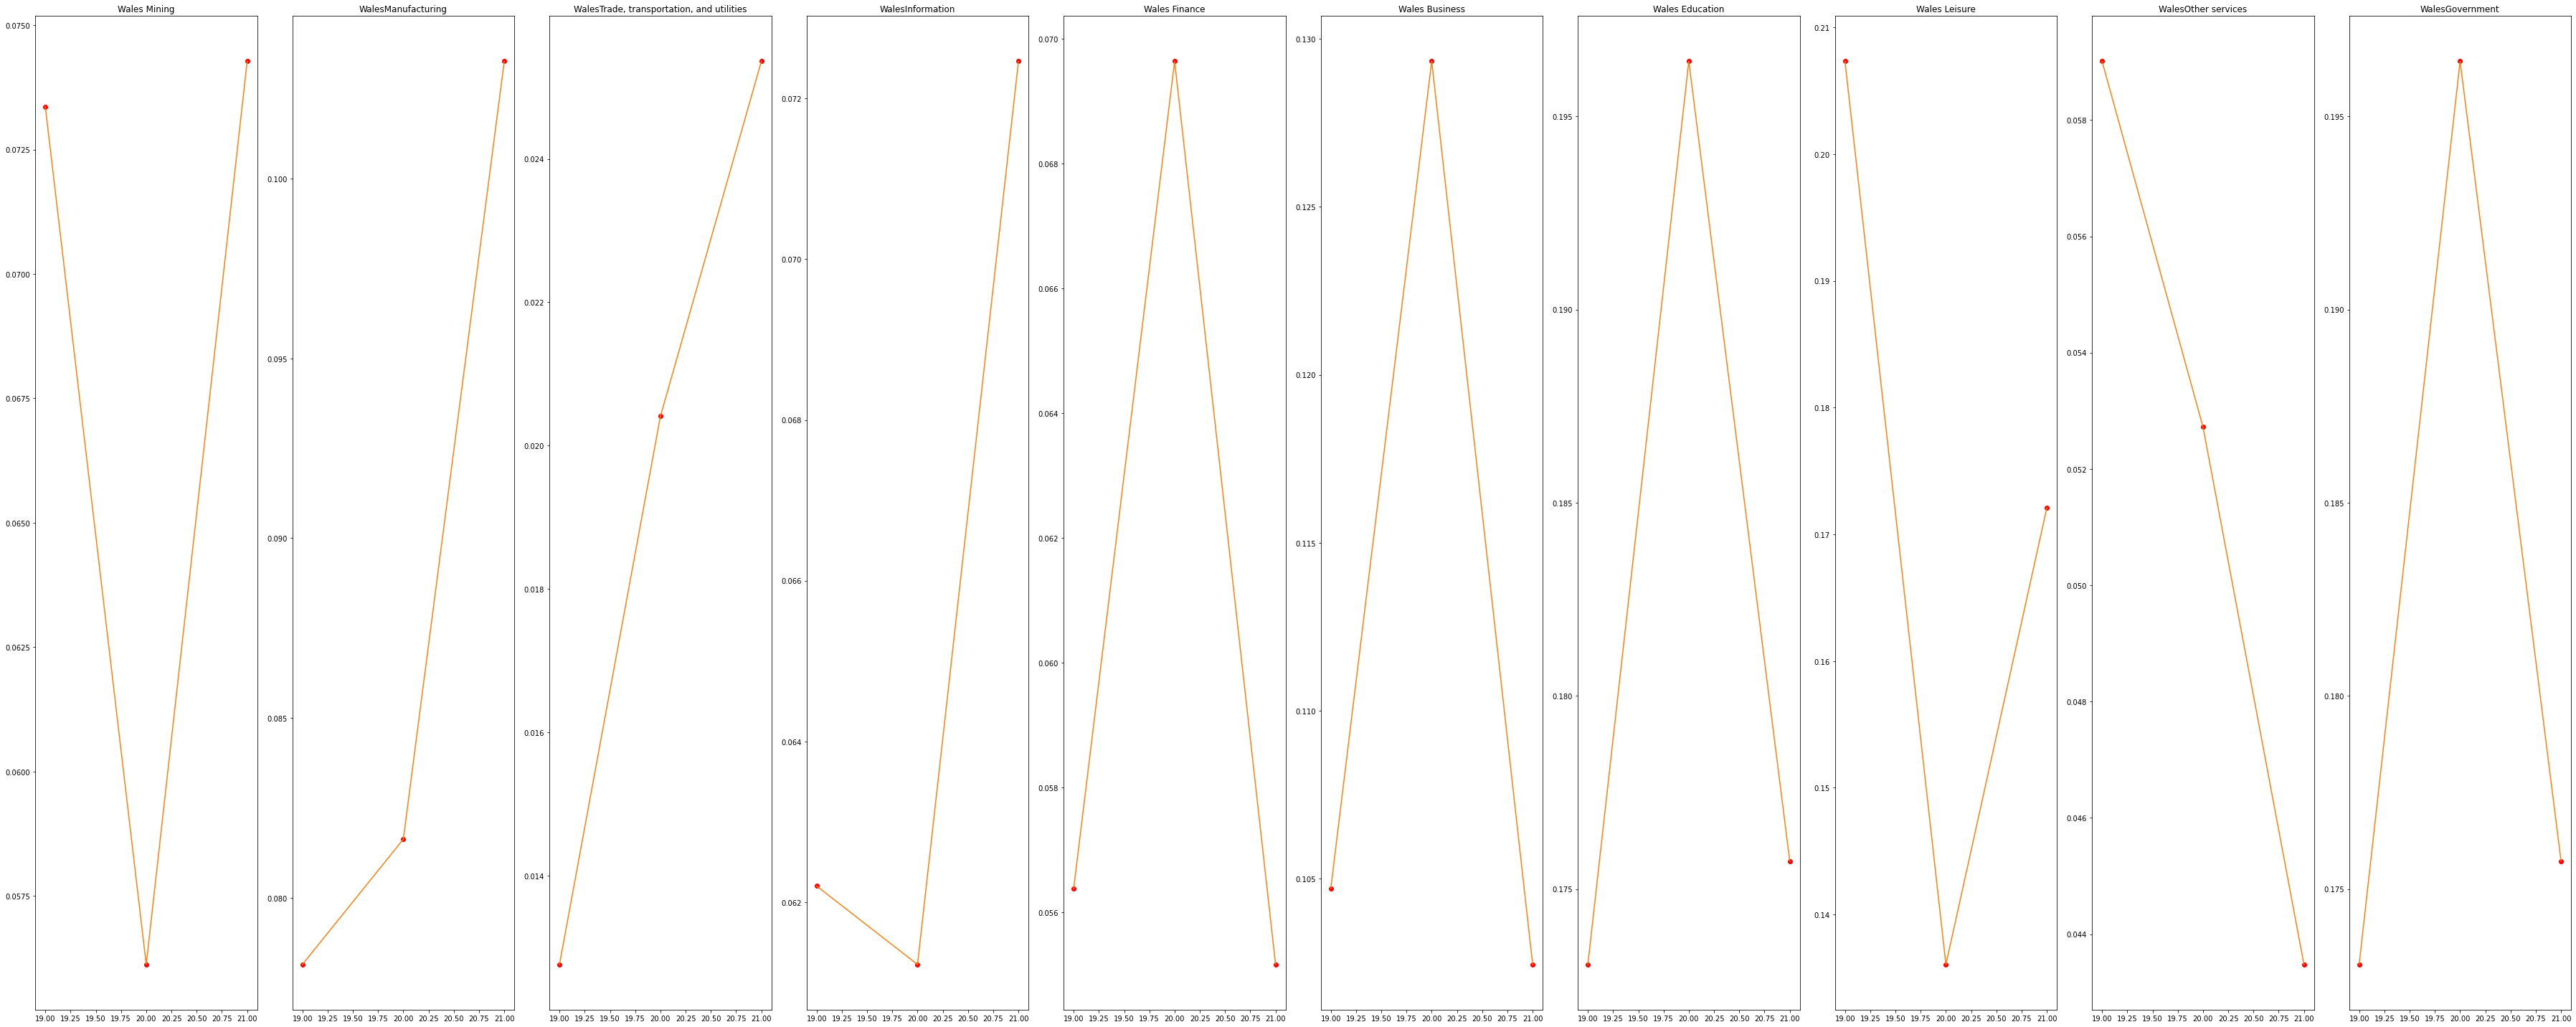

In [36]:
for city in range(len(employment_2019_2021)):

  fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(1, 10, figsize=(15,15))
  axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

  fig.set_size_inches(50,20)

  column_2024 = []
  column_2027 = []
  for professions in (range(len(employment_2019_2021[city].T.columns))):
    if (professions != "Job Activity"):
      x_train = np.array(rows_2019_2021[city]).reshape(-1, 1)
      y_train = np.array(employment_2019_2021[city].T[professions].values[1:]).reshape(-1, 1)
      naming = employment_2019_2021[city].T[professions].values[0]

      poly_reg = PolynomialFeatures(degree=2)
      X_poly = poly_reg.fit_transform(x_train)
      pol_reg = LinearRegression()
      pol_reg.fit(X_poly, y_train)

      correct_axes = axes[professions]

      correct_axes.scatter(x_train, y_train, color='red')
      correct_axes.plot(x_train, pol_reg.predict(poly_reg.fit_transform(x_train)), 'tab:orange')

      if (naming == "Mining, logging, construction"): correct_axes.set_title(cities[city] + " Mining")
      elif (naming == "Trade, transportation, utilities"): correct_axes.set_title(cities[city] + " Trade")
      elif (naming == "Financial activities"): correct_axes.set_title(cities[city] + " Finance")
      elif (naming == "Professional and business services"): correct_axes.set_title(cities[city] + " Business")
      elif (naming == "Education and health services"): correct_axes.set_title(cities[city] + " Education")
      elif (naming == "Leisure and hospitality"): correct_axes.set_title(cities[city] + " Leisure")
      elif (naming == "Other Services"): correct_axes.set_title(cities[city] + " Other")
      else: correct_axes.set_title(cities[city] + naming)


      column_2024.append(pol_reg.predict(poly_reg.fit_transform([[24]]))[0][0])
      column_2027.append(pol_reg.predict(poly_reg.fit_transform([[27]]))[0][0])

  print(column_2024)
  employment_2019_2021[city]['24'] = column_2024
  employment_2019_2021[city]['27'] = column_2027
  plt.tight_layout()

In [38]:
for city in range(len(employment_2000_2019)):
  employment_2000_2019[city].to_csv(path_to_folder + 'Results/' + cities[city] + '_2000_2019.csv')
  employment_2019_2021[city].to_csv(path_to_folder + 'Results/' + cities[city] + '_2019_2021.csv')
  employment_2000_2021[city].to_csv(path_to_folder + 'Results/' + cities[city] + '_2000_2021.csv')

In [90]:
employment_2019_2021[0]

,Job Activity,19,20,21,24,27
0,"Mining, logging, construction",0.061146,0.065666,0.064056,0.022452,-0.074314
1,Manufacturing,0.088317,0.085128,0.083109,0.084077,0.095579
2,"Trade, transportation, and utilities",0.190723,0.197301,0.194389,0.128720,-0.022353
3,Information,0.061530,0.067587,0.081239,0.167768,0.322654
4,Financial activities,0.048591,0.050753,0.051198,0.042230,0.017808
5,Professional and business services,0.144767,0.149479,0.162186,0.248271,0.406306
6,Education and health services,0.135614,0.137549,0.130625,0.056700,-0.096954
7,Leisure and hospitality,0.099578,0.076130,0.077732,0.232846,0.613418
8,Other services,0.037713,0.035942,0.034658,0.033734,0.037200
9,Government,0.132020,0.134466,0.120807,-0.016798,-0.299342


In [94]:
employment_2000_2021[0]

,Job Activity,0,10,15,19,20,21,24,27
0,"Mining, logging, construction",0.061074,0.050141,0.056706,0.061146,0.065666,0.064056,0.074347,0.084560
1,Manufacturing,0.127792,0.100162,0.099645,0.088317,0.085128,0.083109,0.079950,0.075856
2,"Trade, transportation, and utilities",0.195532,0.180891,0.187642,0.190723,0.197301,0.194389,0.205594,0.216607
3,Information,0.047742,0.052600,0.051623,0.061530,0.067587,0.081239,0.086357,0.101096
4,Financial activities,0.061134,0.055239,0.050776,0.048591,0.050753,0.051198,0.049708,0.049713
5,Professional and business services,0.132417,0.132370,0.142214,0.144767,0.149479,0.162186,0.167366,0.180461
6,Education and health services,0.110317,0.138847,0.133054,0.135614,0.137549,0.130625,0.125965,0.117211
7,Leisure and hospitality,0.087557,0.093385,0.098057,0.099578,0.076130,0.077732,0.070672,0.057694
8,Other services,0.034711,0.037906,0.037168,0.037713,0.035942,0.034658,0.033661,0.031377
9,Government,0.141725,0.158460,0.143114,0.132020,0.134466,0.120807,0.106381,0.085426
